# Swin Unet

- Model implematation: https://medium.com/@ashishbisht0307/swin-transformer-based-unet-architecture-for-semantic-segmentation-with-pytorch-code-91e779334e8e
- Paper: https://arxiv.org/abs/2105.05537


In [1]:
%pip install einops timm imutils torchvision lightning torchmetrics

  Preparing metadata (setup.py) ... - \ done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.5/808.5 kB 32.3 MB/s eta 0:00:00
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=fc2c6fcc1a5a9322010e2a475f08921e817538b4d05fbe0a71de6dce1417d61d
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [2]:
try:
    from utils import get_seg_lightning_modules, get_segmentation_plot, local_paths, kaggle_paths
    from swin_unet import SwinTransformerSys
except Exception as e:
    import sys
    sys.path.append("/kaggle/input/segmentation-util")
    from utils import get_seg_lightning_modules, get_segmentation_plot, local_paths, kaggle_paths
    from swin_unet import SwinTransformerSys
from lightning.pytorch.callbacks import EarlyStopping



/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
FAST = False # Fast dev: run 1 batch only
LOCAL = True
ACCELERATOR = 'mps'

dataset_paths = local_paths if LOCAL else kaggle_paths

## Shenzhen


In [4]:
s_dm, s_module, s_trainer = get_seg_lightning_modules(
    data_paths=dataset_paths['shenzen'],
    model_name='shenzen_swinunet',
    model=SwinTransformerSys(img_size=512, patch_size=4, window_size=2, num_classes=2, embed_dim=48),
    fast=FAST,
    accelerator=ACCELERATOR,
    devices='auto', 
    learning_rate=1e-5,
    max_epochs=20,
    callbacks=[EarlyStopping('val_loss', patience=5)],
    ckpt='./logs/large_swinunet/shenzen_swinunet/version_0/checkpoints/epoch=19-step=3180.ckpt'
)

SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.1;num_classes:2
---final upsample expand_first---


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3588.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [5]:
s_trainer.test(s_module, s_dm)

Missing logger folder: logs/shenzen_swinunet


142 examples in the test set...


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 71/71 [00:18<00:00,  3.75it/s]
f1: 0.9717214073933346
accuracy: 0.9579035799268266
precision: 0.9714420815588722
recall: 0.9722496078047954
mean_iou: 0.9373919099149569
dice: 0.9579035799268266


[{}]

142 examples in the test set...


[<Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>]

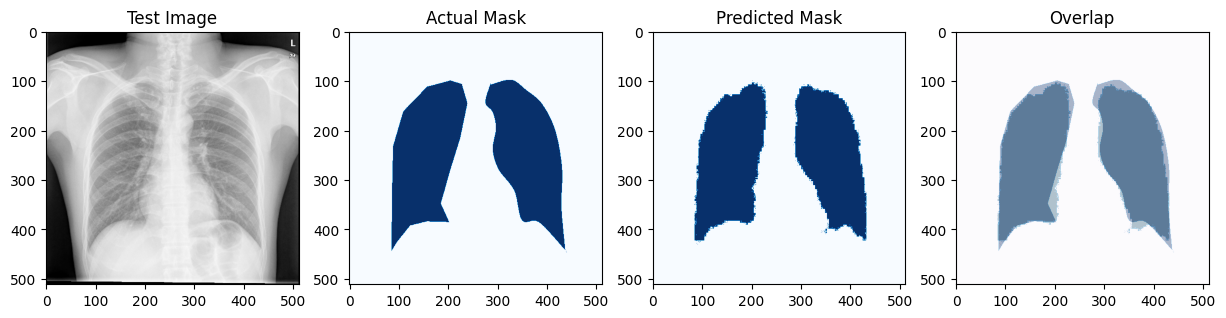

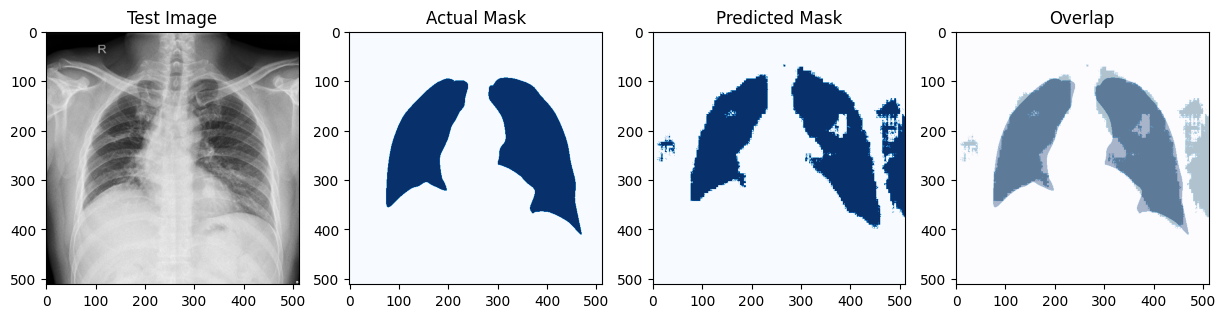

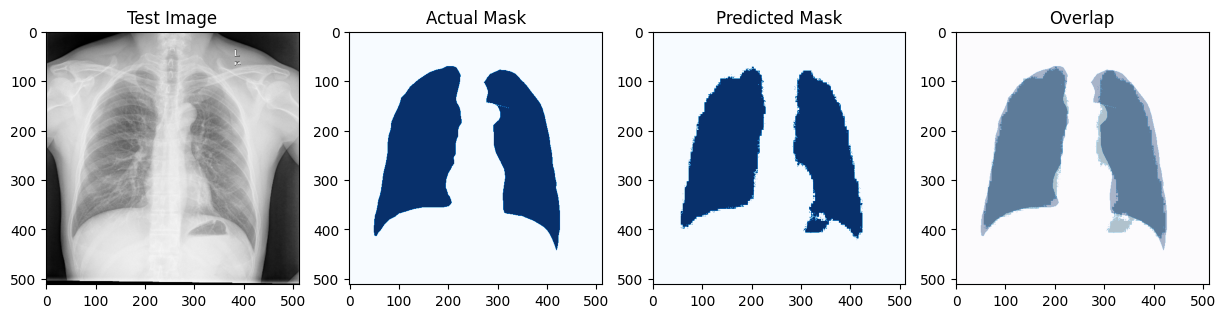

In [10]:
s_dm.setup('test')
get_segmentation_plot(
    s_module.model, 
    s_dm.test, 
    device='cpu')

## Darwin


In [7]:
d_dm, d_module, d_trainer = get_seg_lightning_modules(
    data_paths=dataset_paths['darwin'],
    model_name='darwin_swinunet',
    model=SwinTransformerSys(img_size=512, patch_size=4, window_size=2, num_classes=2, embed_dim=48),
    fast=FAST,
    accelerator=ACCELERATOR,
    devices='auto',
    learning_rate=1e-5,
    max_epochs=20,
    callbacks=[EarlyStopping('val_loss', patience=5)],
    ckpt='./logs/large_swinunet/darwin_swinunet/version_0/checkpoints/epoch=19-step=34340.ckpt'
)

SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.1;num_classes:2
---final upsample expand_first---


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [8]:
d_trainer.test(d_module, d_dm)

Missing logger folder: logs/darwin_swinunet


1527 examples in the test set...


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 764/764 [02:56<00:00,  4.33it/s]
f1: 0.9725489019567429
accuracy: 0.9630190564699822
precision: 0.9639605488920711
recall: 0.9816209836936122
mean_iou: 0.9407866332699492
dice: 0.9630190564699822


[{}]

1527 examples in the test set...


[<Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>,
 <Figure size 1500x1000 with 4 Axes>]

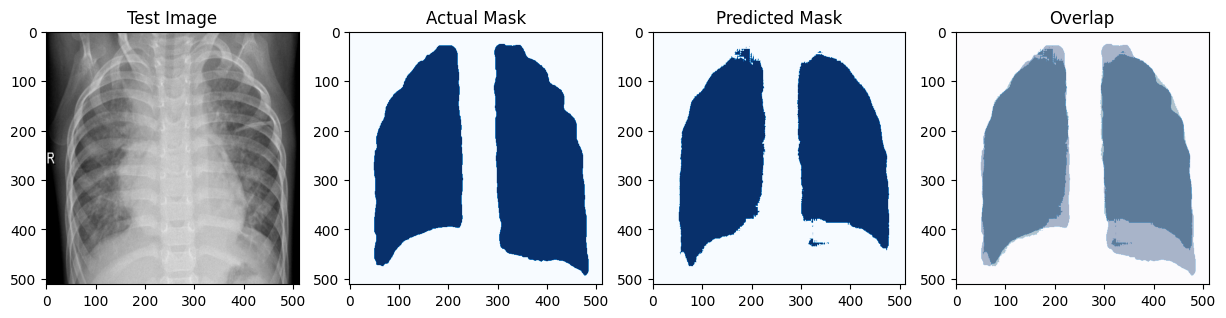

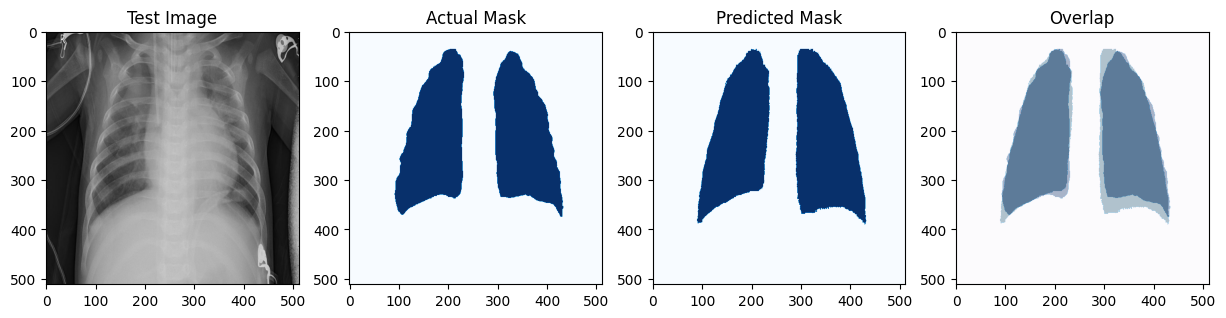

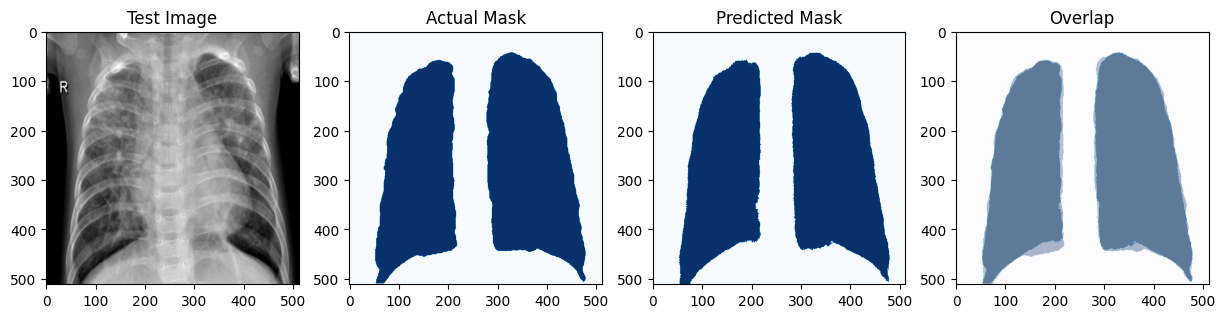

In [9]:
d_dm.setup('test')
get_segmentation_plot(
    d_module.model,
    d_dm.test,
    device='cpu'
)

## Covid


In [11]:
c_dm, c_module, c_trainer = get_seg_lightning_modules(
    data_paths=dataset_paths['covid'],
    model_name='covid_swinunet',
    model=SwinTransformerSys(img_size=256, patch_size=4, window_size=2, num_classes=2, embed_dim=48),
    fast=FAST,
    accelerator=ACCELERATOR,
    devices='auto',
    learning_rate=1e-5,
    max_epochs=20,
    callbacks=[EarlyStopping('val_loss', patience=5)],
    ckpt='./logs/large_swinunet/covid_swinunet/version_0/checkpoints/epoch=19-step=20340.ckpt'
)

SwinTransformerSys expand initial----depths:[2, 2, 2, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.1;num_classes:2
---final upsample expand_first---


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.3, which is newer than your current Lightning version: v2.3.0
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [12]:
c_trainer.test(c_module, c_dm)

Missing logger folder: logs/covid_swinunet


904 examples in the test set...


/Users/haily/.pyenv/versions/3.10.4/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:419: Consider setting `persistent_workers=True` in 'test_dataloader' to speed up the dataloader worker initialization.


Testing DataLoader 0: 100%|██████████| 452/452 [00:37<00:00, 11.99it/s]
f1: 0.9809589500712083
accuracy: 0.9713129195491824
precision: 0.9758938830510705
recall: 0.9863799209088351
mean_iou: 0.9583529661187028
dice: 0.9713129195491824


[{}]

904 examples in the test set...


[<Figure size 1200x800 with 3 Axes>,
 <Figure size 1200x800 with 3 Axes>,
 <Figure size 1200x800 with 3 Axes>]

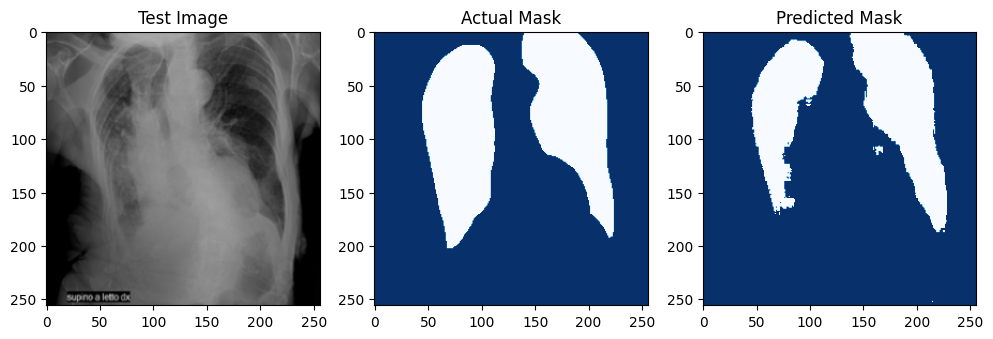

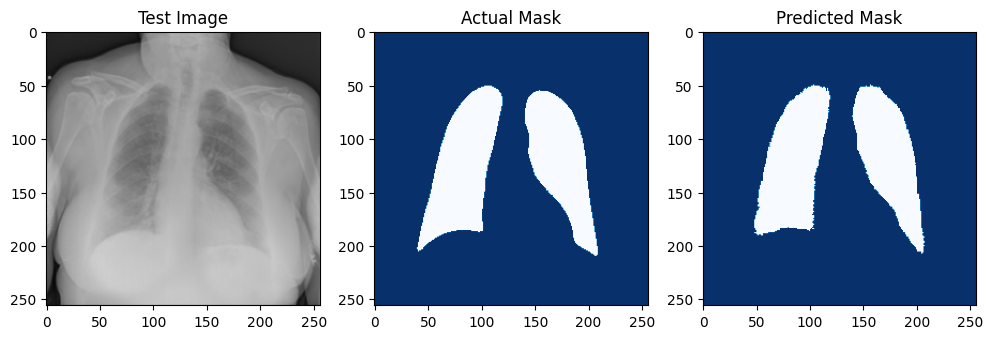

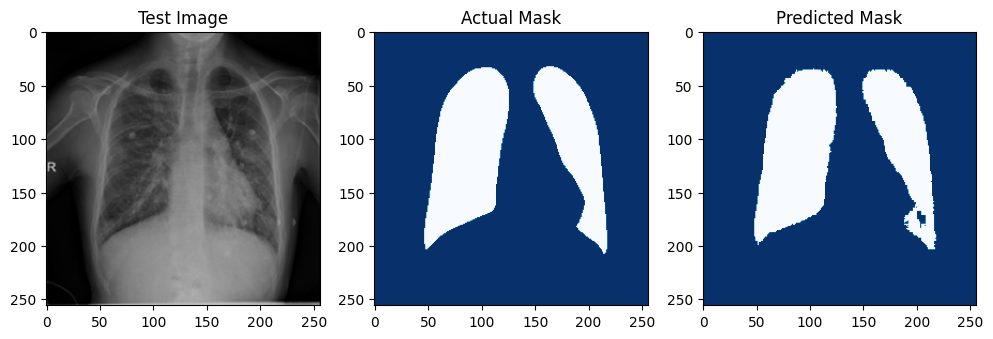

In [11]:
c_dm.setup('test')
get_segmentation_plot(
    c_module.model, 
    c_dm.test,
    device='cpu')

In [12]:
!tar -zcvf swinunet_results.tar.gz /kaggle/working/results

tar: Removing leading `/' from member names
/kaggle/working/results/
/kaggle/working/results/covid_swinunet.csv
/kaggle/working/results/shenzen_swinunet.csv
/kaggle/working/results/darwin_swinunet.csv


In [13]:
!tar -zcvf swinunet_logs.tar.gz /kaggle/working/logs

tar: Removing leading `/' from member names
/kaggle/working/logs/
/kaggle/working/logs/shenzen_swinunet/
/kaggle/working/logs/shenzen_swinunet/version_0/
/kaggle/working/logs/shenzen_swinunet/version_0/metrics.csv
/kaggle/working/logs/shenzen_swinunet/version_0/checkpoints/
/kaggle/working/logs/shenzen_swinunet/version_0/checkpoints/epoch=19-step=3180.ckpt
/kaggle/working/logs/shenzen_swinunet/version_0/hparams.yaml
/kaggle/working/logs/darwin_swinunet/
/kaggle/working/logs/darwin_swinunet/version_0/
/kaggle/working/logs/darwin_swinunet/version_0/metrics.csv
/kaggle/working/logs/darwin_swinunet/version_0/checkpoints/
/kaggle/working/logs/darwin_swinunet/version_0/checkpoints/epoch=19-step=34340.ckpt
/kaggle/working/logs/darwin_swinunet/version_0/hparams.yaml
/kaggle/working/logs/covid_swinunet/
/kaggle/working/logs/covid_swinunet/version_0/
/kaggle/working/logs/covid_swinunet/version_0/metrics.csv
/kaggle/working/logs/covid_swinunet/version_0/checkpoints/
/kaggle/working/logs/covid_swi